This is the inverse plot to the disthist plots.
That means for we compare the different MCMs fitted on their digits. We compare which distributions they come up when seeing a specific digit (e.g., test samples of digit 0). 

In [15]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [16]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [17]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [18]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../Output/sample_sizes")


In [19]:
# raise KeyboardInterrupt # load data instead
# n_runs = 10
# mcm_digit = 0

# nr_digits = 10

# test_probs = np.zeros((nr_digits, len(sample_sizes), n_runs,nr_digits, len(utils.load_test_data(digit=0))))
# for mcm_digit in range(nr_digits):

#     for test_digit in range(nr_digits):
#         test_data = utils.load_test_data(digit=test_digit)

#         for sample_size_idx, sample_size in enumerate(sample_sizes):

#             mcms = mcms_samplesizes[sample_size_idx][:n_runs]
#             counts_gstar = counts_samplesizes[sample_size_idx][:n_runs]
                
#             for run_idx, mcm in enumerate(mcms):
#                 test_probs[mcm_digit][sample_size_idx][run_idx][test_digit] = utils.probabilities_gstar(mcm[mcm_digit], counts_gstar[run_idx][mcm_digit], test_data, sample_size,smooth=True)


In [20]:
# np.save("./../OUTPUT/general_files/test_probs_all_MCM_all_dig_10runs.npy",test_probs)


In [21]:
test_probs = np.load("./../OUTPUT/general_files/test_probs_all_MCM_all_dig_10runs.npy")


In [22]:
# test_probs.shape, test_probs[0,ss_idx,0]

In [23]:
# # a = test_probs[0,ss_idx,0, seedigit].T
# # b = test_probs[1,ss_idx,0, seedigit].T

# def norm_distribution_distance(dist_a,dist_b):
#     """
#     Implements logic based on to |mu_1 - mu_2| > (sigma_1 + sigma_2).
#     Formula used:
#      [|mu_1 - mu_2| - (sigma_1 + sigma_2)] / (mu_1 + mu_2)

#      Positive if mean difference is larger than twice the standard deviation.
#      Negative if smaller.
#      0 if equal.
    

#     :param a: _description_
#     :type a: _type_
#     :param b: _description_
#     :type b: _type_
#     """

#     return np.divide(np.abs(np.mean(dist_a) - np.mean(dist_b)) - (np.std(dist_a) +  np.std(dist_b)),
#                      np.mean(dist_a) + np.mean(dist_b))


# # norm_distribution_distance(a,b)


# def total_variation_distance(dist_a, dist_b):
#     """
#     Calculates the total variation distance (TV)/ normalized L1 distance between two probability distributions.
    
#     :param dist_a: The first probability distribution.
#     :type dist_a: numpy.ndarray
#     :param dist_b: The second probability distribution.
#     :type dist_b: numpy.ndarray
#     :return: The total variation distance between the two distributions.
#     :rtype: float
#     """
#     return 0.5 * np.sum(np.abs(dist_a - dist_b)) / len(dist_a)

# # norm_distribution_distance(a,b), total_variation_distance(a,b)

AttributeError: module 'src.paper_utils' has no attribute 'norm_distribution_distance'

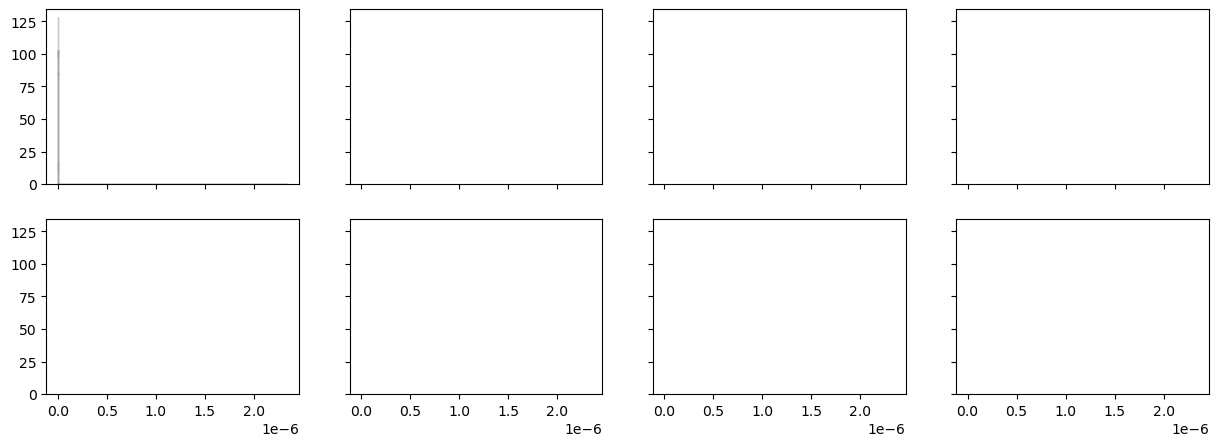

In [24]:

seedigit = 5

colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    data = test_probs[:,ss_idx,0].T
    ax = axs[ss_idx]



    logbins = np.geomspace(data.min(),data.max(), 40)

    for mcm_idx in [3,5]:
        data = test_probs[mcm_idx,ss_idx,0, seedigit].T
        ax.hist(data,bins=logbins, facecolor="None",alpha=.2,edgecolor="black",histtype= "stepfilled")
        ax.hist(data,bins=logbins, label=f'{mcm_idx}',alpha=.5,histtype= "stepfilled",facecolor=colors[mcm_idx])
    ax.text(.1,.8,f"Our distance {utils.norm_distribution_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)
    ax.text(.1,.7,f"TVD {utils.total_variation_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)



    # if ss_idx == len(sample_sizes)-3:
    #     handles, labels = ax.get_legend_handles_labels()
    #     ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

    ax.set_title(sample_size)
    ax.set_xscale("log")

handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.95,0.5)) #bbox_to_anchor=(.95,0.5)
leg.set_title("MCM",)

fig.supxlabel(f"Probability for digit {seedigit} at g* on testset (logscale)")

supylabel = fig.supylabel('Frequency')
supylabel.set_x(supylabel.get_position()[0] + 0.05)



plt.show()




# same for indicative ICC now

In [ ]:
# example digits as variabels
# find indicative icc using the decision boundary

# plot disthist 
